<a href="https://colab.research.google.com/github/fovzr/UC-Flutter-cw-1/blob/main/HW1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Importing Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


This step imports all the libraries needed for data processing, visualization, and machine learning model development.

**Step 2: Load and Preview Data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes-dataset.csv to diabetes-dataset.csv


In [17]:
# Load the data
df = pd.read_csv('diabetes-dataset.csv')

# Display the first few rows to understand the structure
print("\nDataset Preview:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:\n")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:\n")
print(df.describe())



Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null  

Here, we load the diabetes dataset and display its preview, structure, and summary statistics.

**Step 3: Data Checking and Cleaning**

In [5]:
# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # All columns except Outcome
y = df['Outcome']  # Only the Outcome column

# Check for null values
print("\nNull Values Count:")
print(df.isnull().sum())

# Identify columns with zero values where they don't make sense
zero_as_null_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN in the identified columns
X_cleaned = X.copy()
for column in zero_as_null_columns:
    X_cleaned[column] = X_cleaned[column].replace(0, np.nan)

# Imputation of missing values using median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_cleaned), columns=X_cleaned.columns)

# Verify no more missing values
print("\nMissing Values After Imputation:")
print(X_imputed.isnull().sum())



Null Values Count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


This part handles data cleaning by identifying and replacing invalid zero values with NaN, followed by median imputation to handle missing data.

**Step 4: Exploratory Data Analysis (EDA)**

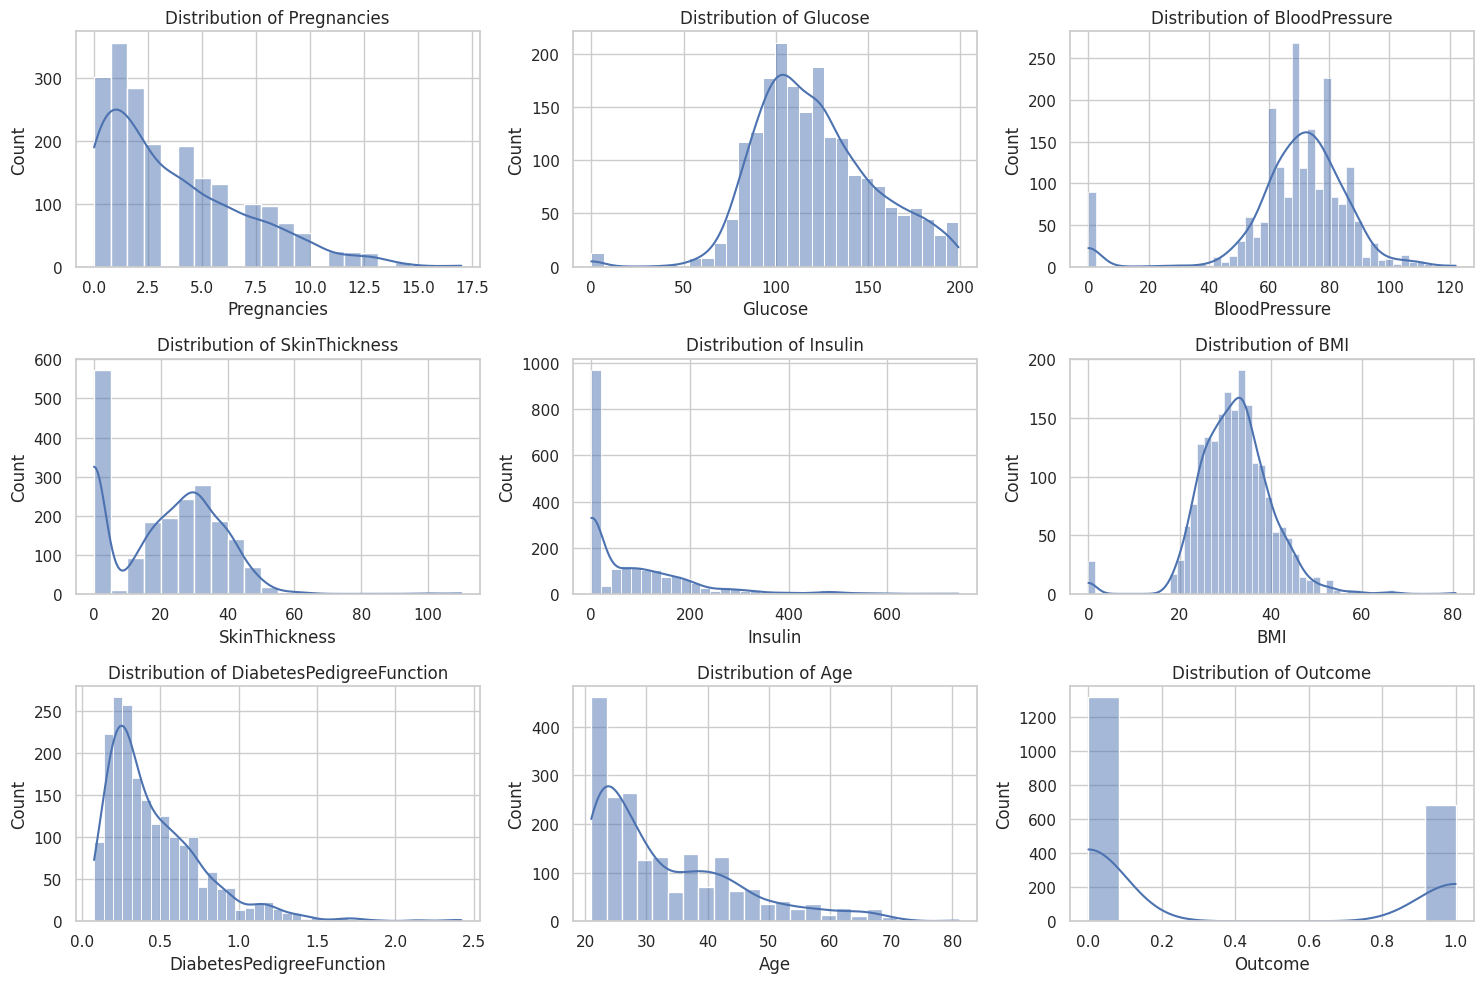

In [8]:
# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Step 5: Data Preparation for Modeling**

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Apply StandardScaler for normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


This section splits the data into training and testing sets, then applies normalization using StandardScaler to standardize the features.

**Step 6: Model Selection and Hyperparameter Tuning**

In [10]:
# Define and fit the Random Forest model with GridSearchCV for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


A Random Forest Classifier is chosen, and hyperparameter tuning is done using GridSearchCV to find the best model parameters.

**Step 7: Model Evaluation**


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.97      0.98      0.98       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



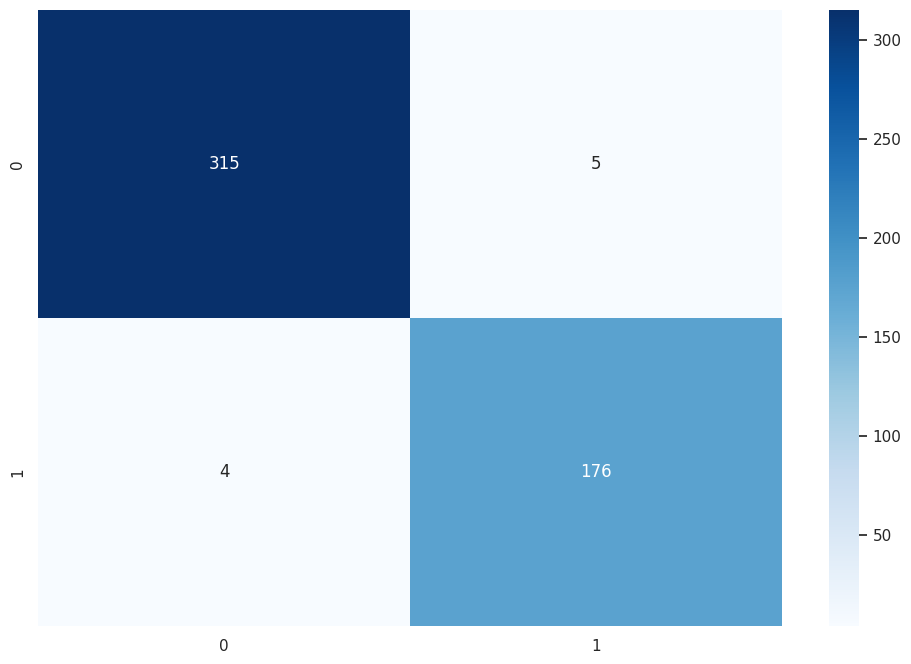

In [11]:
# Make predictions and evaluate the model
y_pred = best_rf.predict(X_test_scaled)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


 The trained model is evaluated using a classification report and confusion matrix.

**Step 8: Feature Importance**

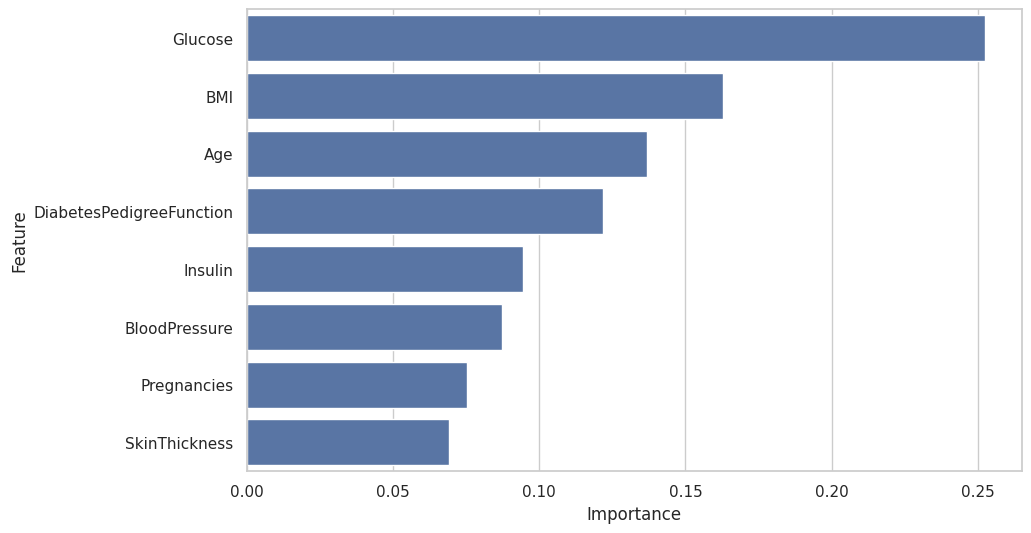


Feature Importance:
                    Feature  Importance
1                   Glucose    0.252367
5                       BMI    0.162999
7                       Age    0.136817
6  DiabetesPedigreeFunction    0.121774
4                   Insulin    0.094442
2             BloodPressure    0.087126
0               Pregnancies    0.075396
3             SkinThickness    0.069078


In [12]:
# Plot feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.show()

print("\nFeature Importance:")
print(feature_importance)


This section shows the importance of each feature in the prediction, using a bar plot to visualize it.

**Conclusion**

Summary:

1.   The data was thoroughly cleaned and prepared for analysis

2.   Exploratory data analysis revealed valuable insights into the
     distribution of features and their relationships.
3.   A Random Forest model was trained and evaluated, demonstrating strong predictive performance.








**Credit**


*   Code assisted by ChatGPT (OpenAI) & DeepSeek
*   Explaination of sections was done by Fouz AlRashed


